Load and preprocess dataset

In [1]:
import pathlib
import pandas as pd
import numpy as np

dataset_path = next((pathlib.Path.cwd().parent / "reddit-sentiment").glob("*.csv"))
df = pd.read_csv(dataset_path)

# https://stackoverflow.com/a/34258961 and 
df["date"] = pd.to_datetime((np.asarray(df['year'], dtype='datetime64[Y]')-1970)+(np.asarray(df['day'], dtype='timedelta64[D]')-1))
df = df.set_index("date")

In [2]:
df.head(15)

,year,day,subreddit,avg_polarity,avg_subjectivity,count
date,,,,,,
2005-12-12,2005,346,reddit.com,0.059489,0.313904,76
2005-12-18,2005,352,reddit.com,0.066328,0.358076,34
2005-12-22,2005,356,reddit.com,0.113660,0.440575,70
2005-12-23,2005,357,reddit.com,0.129018,0.353833,94
2005-12-24,2005,358,reddit.com,0.119258,0.417002,92
2005-12-25,2005,359,reddit.com,0.119466,0.431318,94
2005-12-26,2005,360,reddit.com,0.093808,0.427382,76
2005-12-27,2005,361,reddit.com,0.113608,0.394427,114
2005-12-28,2005,362,reddit.com,0.144086,0.438743,122


Inspect the number of subreddits over time

In [3]:
df[["year", "subreddit"]].groupby("year").nunique("subreddit")

,subreddit
year,
2005,1
2006,34
2007,46
2008,2695
2009,3827


Number of total posts on reddit over time

<AxesSubplot: xlabel='date'>

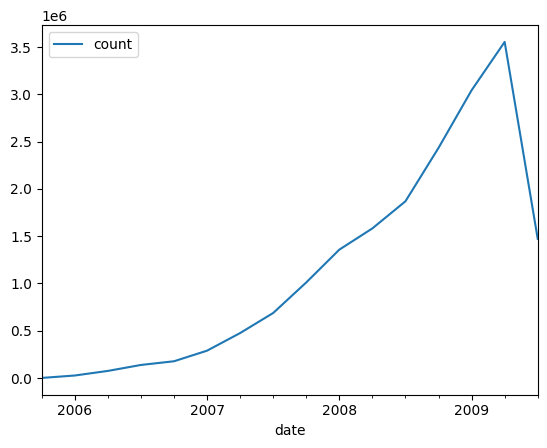

In [4]:
df[["count"]].resample("Q").sum("count").plot(kind="line")

How steady are subreddits over time? Do we have the same number of posts every day?

<AxesSubplot: xlabel='date'>

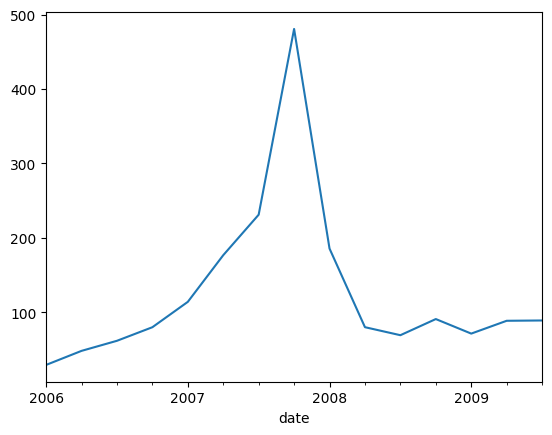

In [5]:
std_subreddit_per_month = df[["subreddit", "count"]].groupby("subreddit").resample("M")["count"].std().dropna()
std_total_per_quarter = std_subreddit_per_month.droplevel("subreddit").resample("Q").std().dropna()
std_total_per_quarter.plot(kind="line")

Identify the most popular subreddits over time, which will come in handy later

In [6]:
subreddits_by_count = df[["count", "subreddit"]].groupby("subreddit")["count"].sum().sort_values(ascending=False)
top_reddits = subreddits_by_count.index[:10].values
top_reddits

array(['reddit.com', 'politics', 'AskReddit', 'programming', 'pics',
       'WTF', 'science', 'worldnews', 'funny', 'technology'], dtype=object)

Plot polarity over time

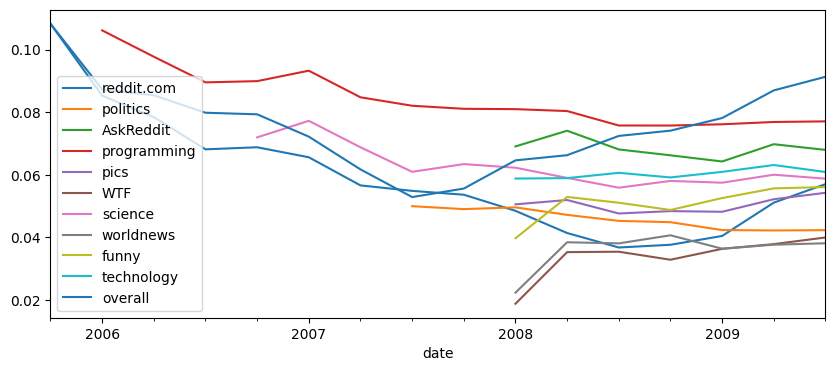

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    ax = df[df["subreddit"] == subreddit].resample("Q")["avg_polarity"].mean().plot(kind="line", ax=ax, label=subreddit)

ax = df.resample("Q")["avg_polarity"].mean().plot(kind="line", ax=ax, label="overall")
plt.legend(loc='best')
plt.show()

Plot subjectiveness over time

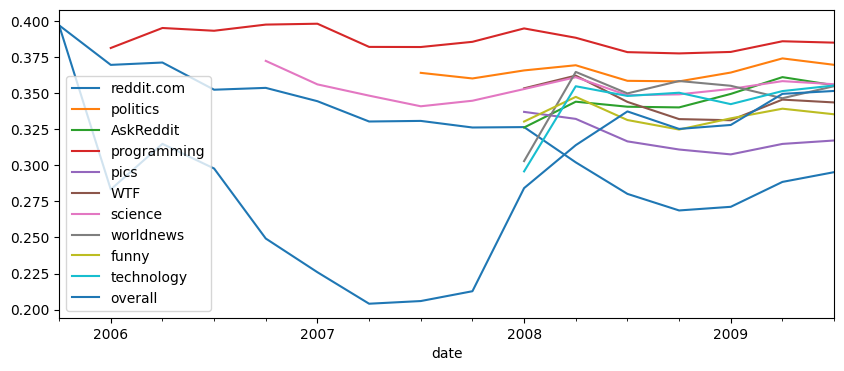

In [8]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    ax = df[df["subreddit"] == subreddit].resample("Q")["avg_subjectivity"].mean().plot(kind="line", ax=ax, label=subreddit)

ax = df.resample("Q")["avg_subjectivity"].mean().plot(kind="line", ax=ax, label="overall")
plt.legend(loc='best')
plt.show()

How much variance is there for polarity?

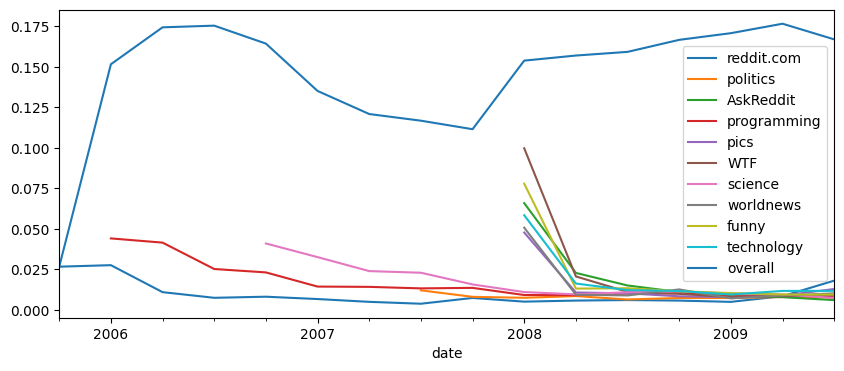

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    std_total_per_quarter = df[df["subreddit"] == subreddit].resample("M")["avg_polarity"].std().dropna().resample("Q").mean()
    ax = std_total_per_quarter.plot(kind="line", ax=ax, label=subreddit)

ax = df.resample("M")["avg_polarity"].std().dropna().resample("Q").mean().plot(kind="line", ax=ax, label="overall")
plt.legend(loc='best')
plt.show()

How much variance is there for subjectiveness?

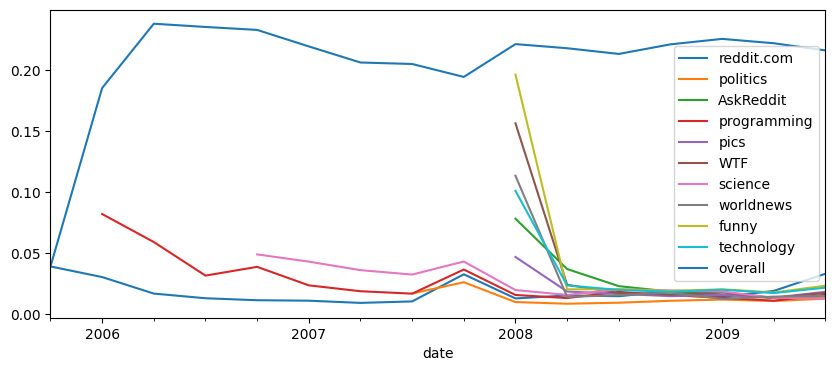

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(4)

for subreddit in top_reddits:
    std_total_per_quarter = df[df["subreddit"] == subreddit].resample("M")["avg_subjectivity"].std().dropna().resample("Q").mean()
    ax = std_total_per_quarter.plot(kind="line", ax=ax, label=subreddit)

ax = df.resample("M")["avg_subjectivity"].std().dropna().resample("Q").mean().plot(kind="line", ax=ax, label="overall")
plt.legend(loc='best')
plt.show()